# Data Description

### Here you could find the data and it's description that is used for our task of Colonoscopy relevantness detection

### Codebook
* quality: a measure of the quality of the recorded video.
* bits: number of bits used to encode that block in the video stream.
* intra_parts: number sub-blocks inside this block that are not encoded by making use of
information in other frames.
* skip_parts: number sub-blocks inside this block that are straight-forward copied from another
frame.
* inter_16x16_parts: number of sub-blocks inside this block making use of information in other
frames and whose size is 16x16 pixels.
* inter_4x4_parts: number of sub-blocks inside this block making use of information in other
frames and whose size is 4x4 pixels.
* inter_other_parts: number of sub-blocks inside this block making use of information in other
frames and whose size is different from 16x16 and 4x4 pixels.
* non_zero_pixels: number of pixels different from 0 after encoding the block.
* frame_width: the width of the video frame in pixels.
* frame_height: the height of the video frame in pixels.
* movement_level: a measure of the level of movement of this frame with respect the previous
one.
* mean: mean of the pixels of the encoded block.
* sub_mean_1: mean of the pixels contained in the first 32x32 sub-bock of the current block.
* sub_mean_2: mean of the pixels contained in the second 32x32 sub-bock of the current block.
* sub_mean_3: mean of the pixels contained in the third 32x32 sub-bock of the current block.
* sub_mean_4: mean of the pixels contained in the fourth 32x32 sub-bock of the current block.
* var_sub_blocks: variance of the four previous values.
* sobel_h: mean of the pixels of the encoded block after applying the Sobel operator in
horizontal direction.
* sobel_v: mean of the pixels of the encoded block after applying the Sobel operator in vertical
direction.
* variance: variance of the pixels of the encoded block.
* block_movement_h: a measure of the movement of the current block in the horizontal
direction.
* block_movement_v: a measure of the movement of the current block in the vertical direction.
* var_movement_h: a measure of the variance of the movements inside the current block in the
horizontal direction.
* var_movement_v: a measure of the variance of the movements inside the current block in the
vertical direction.
* cost_1: a measure of the cost of encoding this block without partitioning it.
* cost_2: a measure of the cost of encoding this block without partitioning it and without
considering any movement in it.
* relevant: the target variable that indicates whether the current block is relevant (1) or not (0).

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [67]:
#There are several variables with missing data
df = pd.read_csv('data.csv', sep=';')
print(df.isna().sum())

quality               0
bits                  0
intra_parts           0
skip_parts            0
inter_16x16_parts     0
inter_4x4_parts       0
inter_other_parts     0
non_zero_pixels       0
frame_width           0
frame_height          0
movement_level        0
mean                  0
sub_mean_1            0
sub_mean_2            0
sub_mean_3           14
sub_mean_4            0
var_sub_blocks        0
sobel_h               0
sobel_v               0
variance              0
block_movement_h      0
block_movement_v      0
var_movement_h        0
var_movement_v        0
cost_1                0
cost_2               17
relevant              2
dtype: int64


In [68]:
# The number of missing data is not significant, so we drop rows with misssing data
df  = df.dropna()
df.shape

(15967, 27)

In [69]:
# Here we explored the number of unique values for each variable and decide which variable should be considered numberical
df.nunique()

quality                  4
bits                  2104
intra_parts             15
skip_parts               5
inter_16x16_parts        5
inter_4x4_parts         12
inter_other_parts       28
non_zero_pixels        568
frame_width              4
frame_height             4
movement_level         205
mean                  6591
sub_mean_1            3119
sub_mean_2            3020
sub_mean_3            3072
sub_mean_4            2974
var_sub_blocks       11427
sobel_h               9891
sobel_v               9875
variance             11971
block_movement_h      2363
block_movement_v      2219
var_movement_h        8408
var_movement_v        8437
cost_1               14358
cost_2               14526
relevant                 2
dtype: int64

In [70]:
#deviding the columns in the appropriate type
cat = df.loc[:, df.nunique() < 30]
cont = df.loc[:, df.nunique() >= 30]

lst = cont.columns.tolist()
lst.append('relevant')
cont_rel = df[lst]

<AxesSubplot:xlabel='frame_height'>

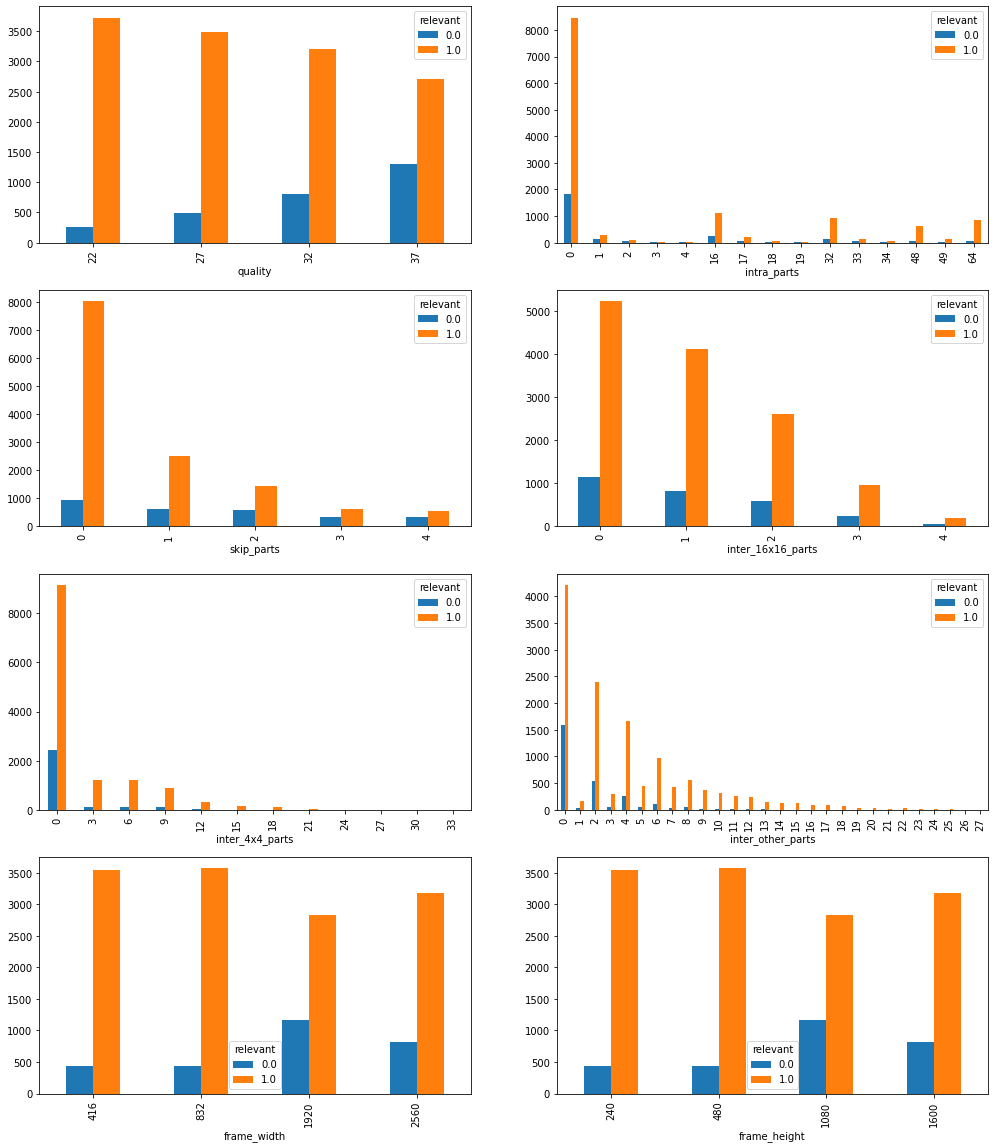

In [71]:
# We explore how the occurence of a certain categorical value increases the chanse of "relevant" to be true
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(ncols=2, nrows=4,figsize=(17, 20))
pd.crosstab(df.quality, df.relevant).plot(kind='bar', ax=ax1)
pd.crosstab(df.intra_parts, df.relevant).plot(kind='bar', ax=ax2)
pd.crosstab(df.skip_parts, df.relevant).plot(kind='bar', ax=ax3)
pd.crosstab(df.inter_16x16_parts, df.relevant).plot(kind='bar', ax=ax4)
pd.crosstab(df.inter_4x4_parts, df.relevant).plot(kind='bar', ax=ax5)
pd.crosstab(df.inter_other_parts, df.relevant).plot(kind='bar', ax=ax6)
pd.crosstab(df.frame_width, df.relevant).plot(kind='bar', ax=ax7)
pd.crosstab(df.frame_height, df.relevant).plot(kind='bar', ax=ax8)

[Text(0, 0.5, 'quality'),
 Text(0, 1.5, 'intra_parts'),
 Text(0, 2.5, 'skip_parts'),
 Text(0, 3.5, 'inter_16x16_parts'),
 Text(0, 4.5, 'inter_4x4_parts'),
 Text(0, 5.5, 'inter_other_parts'),
 Text(0, 6.5, 'frame_width'),
 Text(0, 7.5, 'frame_height'),
 Text(0, 8.5, 'relevant')]

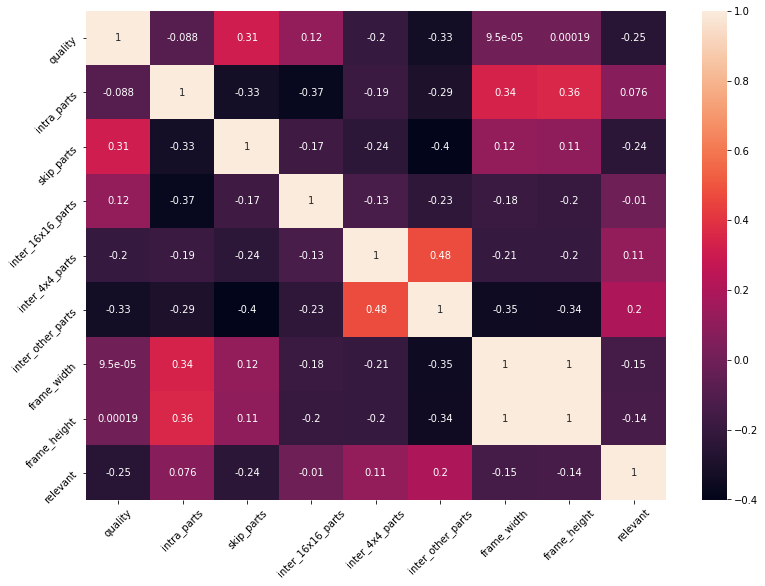

In [72]:
# Here we check hoe the categorical variable correlate with the image relevantness to Colonoscopy
plt.figure(figsize=(13, 9))
corrMatrix = cat.corr()
viz = sns.heatmap(corrMatrix, annot=True)

viz.set_xticklabels(viz.get_xticklabels(), rotation=45)
viz.set_yticklabels(viz.get_yticklabels(), rotation=45)

#plt.savefig('CatCorr.png')

In [73]:
# Here we explore whether the means of variables subgroups being relevant of unrelevant to Colonoscope have a significantly different means
cont_rel.groupby('relevant').mean()

,bits,non_zero_pixels,movement_level,mean,sub_mean_1,sub_mean_2,sub_mean_3,sub_mean_4,var_sub_blocks,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2
relevant,,,,,,,,,,,,,,,,,,
0.0,151.430834,21.758184,4.855167e+06,1.578761,1.770525,1.684900,1.587751,1.271866,4.232547,4.180749,4.214997,29.596506,7.680622,5.120540,977.907523,411.119971,30353.513200,34941.264344
1.0,513.746610,85.281807,3.850511e+06,3.875459,3.439649,3.224487,3.346686,3.190540,7.060803,8.853718,9.144358,58.463528,8.079251,7.161667,803.575505,509.430599,38431.931967,43625.962060


<AxesSubplot:xlabel='relevant', ylabel='cost_2'>

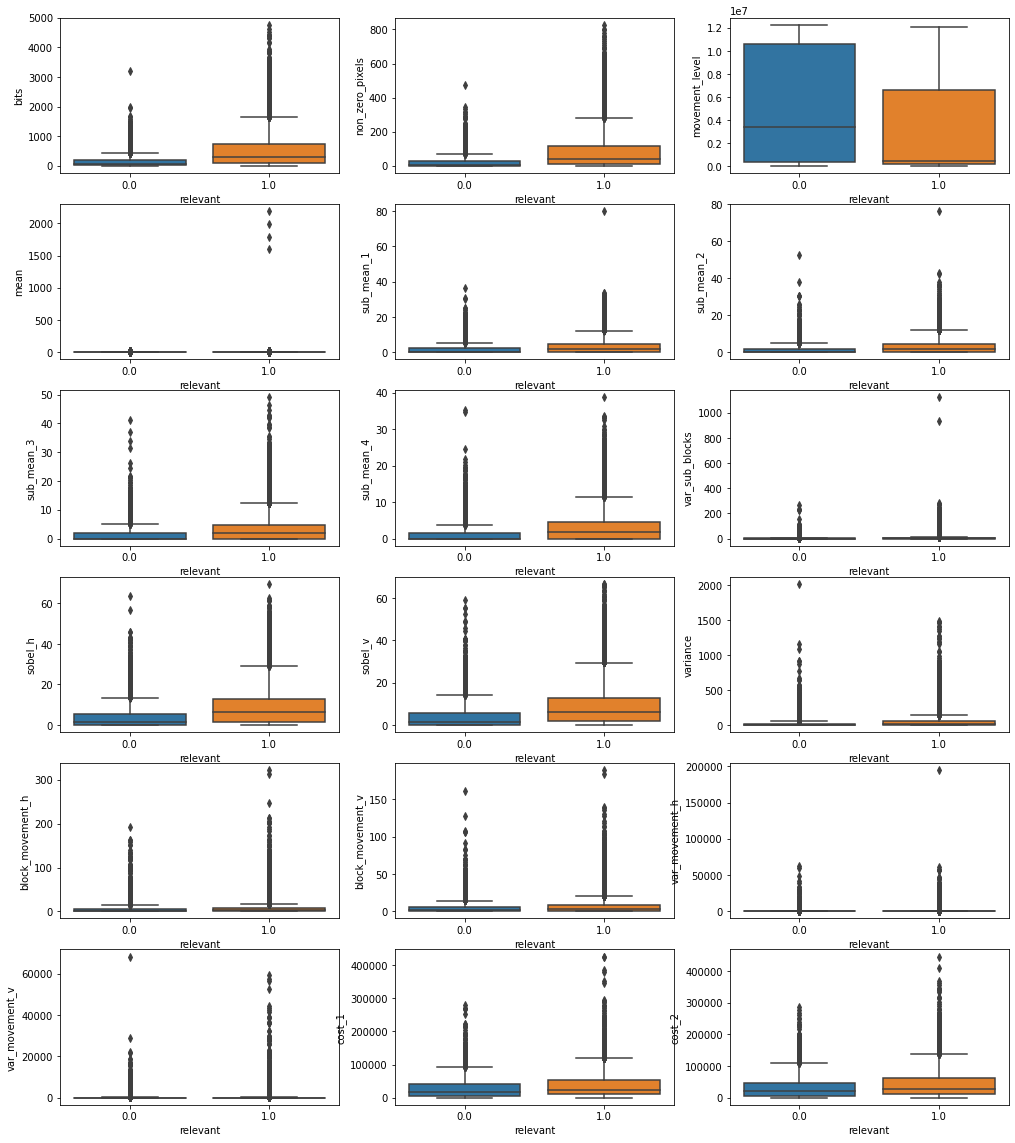

In [74]:
# We visualize the mean difference of variables and cannot claim that any of variable subgroups are equal

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15), (ax16, ax17, ax18)) = plt.subplots(ncols=3, nrows=6,figsize=(17, 20))
sns.boxplot(y=cont_rel.columns[0], x="relevant", data=df, ax=ax1)
sns.boxplot(y=cont_rel.columns[1],x="relevant", data=df, ax=ax2)
sns.boxplot(y=cont_rel.columns[2], x="relevant", data=df, ax=ax3)
sns.boxplot(y=cont_rel.columns[3], x="relevant", data=df, ax=ax4)
sns.boxplot(y=cont_rel.columns[4], x="relevant", data=df, ax=ax5)
sns.boxplot(y=cont_rel.columns[5], x="relevant", data=df, ax=ax6)
sns.boxplot(y=cont_rel.columns[6], x="relevant", data=df, ax=ax7)
sns.boxplot(y=cont_rel.columns[7], x="relevant", data=df, ax=ax8)
sns.boxplot(y=cont_rel.columns[8], x="relevant", data=df, ax=ax9)
sns.boxplot(y=cont_rel.columns[9], x="relevant", data=df, ax=ax10)
sns.boxplot(y=cont_rel.columns[10], x="relevant", data=df, ax=ax11)
sns.boxplot(y=cont_rel.columns[11], x="relevant", data=df, ax=ax12)
sns.boxplot(y=cont_rel.columns[12], x="relevant", data=df, ax=ax13)
sns.boxplot(y=cont_rel.columns[13], x="relevant", data=df, ax=ax14)
sns.boxplot(y=cont_rel.columns[14], x="relevant", data=df, ax=ax15)
sns.boxplot(y=cont_rel.columns[15], x="relevant", data=df, ax=ax16)
sns.boxplot(y=cont_rel.columns[16], x="relevant", data=df, ax=ax17)
sns.boxplot(y=cont_rel.columns[17], x="relevant", data=df, ax=ax18)

In [75]:
from scipy.stats import ttest_rel
from statsmodels.stats.stattools import jarque_bera
import random

def equality_testing(df, variables, y):
    
    def check_normality(var):
            normality = jarque_bera(var)
            if float(normality[1]) < 0.5:
                print(" violates the normality!")
    

    for el in variables:
        zero_y = df.loc[df[y] == 0][el].tolist()
        one_y = df.loc[df[y] == 1][el].tolist()
        print(el.upper())
        sample_size = max(len(zero_y), len(one_y))
        zero_y = random.choices(zero_y, k = sample_size)
        one_y = random.choices(one_y, k = sample_size)
        check_normality(zero_y)
        check_normality(one_y)
        
        if ttest_rel(zero_y, one_y).pvalue >=0.5:
            print("!!!The groups related to 1 or 0 have the same mean :" + el) 
        else:
            print("!!!The groups related to 1 or 0 are different :" + el)

In [76]:
# Here with paired t-test (even the normality assumptions are not met) we claim that each of the subgroups are 
# statistically different and we cannot suspect any variable to be inneficient in identifying relevantnes to Colonoscopy 
equality_testing(cont_rel, cont_rel.columns[:-1].tolist(), cont_rel.columns[-1])

BITS
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :bits
NON_ZERO_PIXELS
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :non_zero_pixels
MOVEMENT_LEVEL
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :movement_level
MEAN
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :mean
SUB_MEAN_1
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :sub_mean_1
SUB_MEAN_2
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :sub_mean_2
SUB_MEAN_3
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :sub_mean_3
SUB_MEAN_4
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :sub_mean_4
VAR_SUB_BLOCKS
 violates the normality!
 violates the 

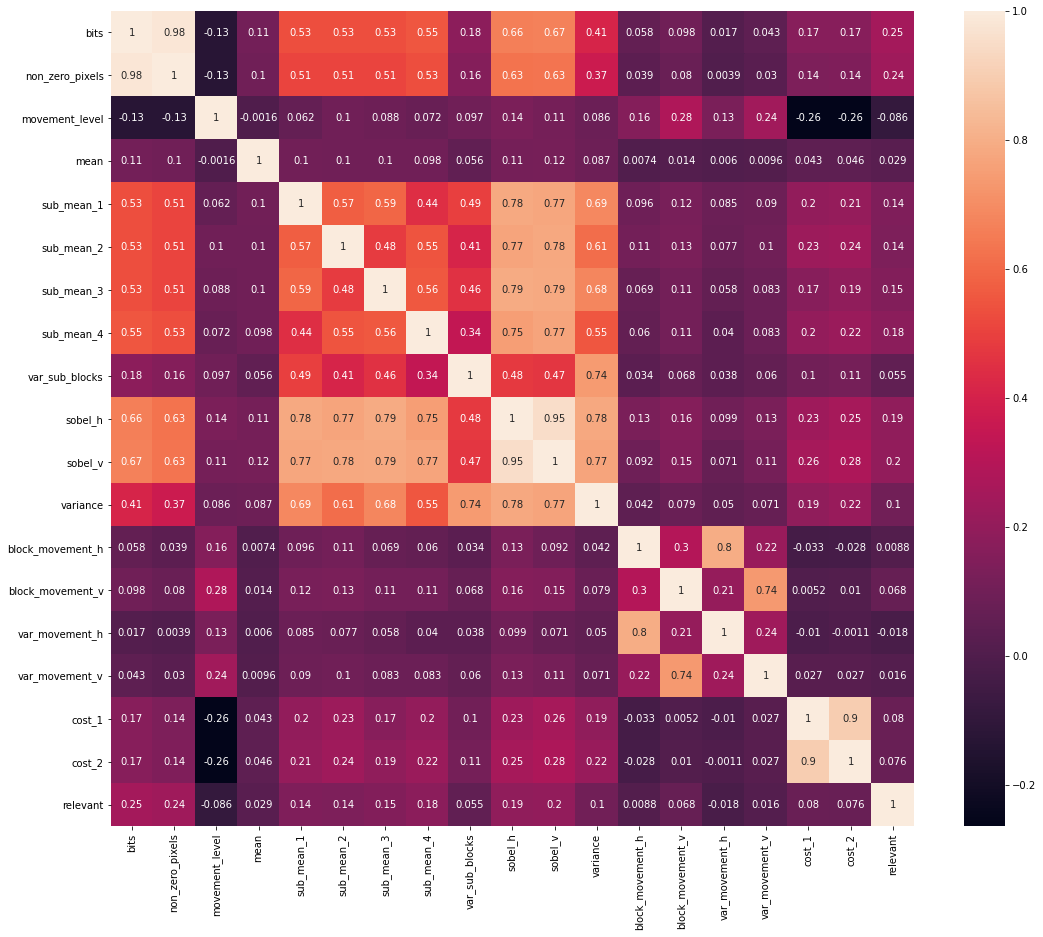

In [77]:
# Here we explore the correlation where we see the correlation rising from 0.02 to 0.25
plt.figure(figsize=(18, 15))
corrMatrix = cont_rel.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Variable selection and Construction

In [78]:
#Here we generate new variables from old ones to reduce the cross-correlation in between the predictor variables and to decrese  needles the model complexity

In [79]:
# The proportion of useful infomation per square
df["pixels_height_width"] = (df['frame_height']*df['frame_width'])/df['non_zero_pixels']
df = df.drop(['frame_height', 'frame_width', 'non_zero_pixels'], axis = 1)

In [80]:
# weighted variance of sub-blocks
df['sub_mean'] = (df['sub_mean_1']+ df['sub_mean_2'] + df['sub_mean_3'] +df['sub_mean_4'])/4
df = df.drop(['sub_mean_1', 'sub_mean_2', 'sub_mean_3', 'sub_mean_4'], axis=1)

In [81]:
# variability per block movement
#df['movement'] = (df['var_movement_h'] + df['var_movement_v'])/(df['block_movement_h'] + df['block_movement_v'])
df['movement_var'] = ((df['block_movement_h']/df['var_movement_h'])+(df['block_movement_v']/df['var_movement_v']))/2
df = df.drop(['block_movement_h', 'block_movement_v', 'var_movement_h', 'var_movement_v'], axis=1)

In [82]:
# the average cost of the block encoding
df['cost'] = (df['cost_1']+df['cost_2'])/2
df = df.drop(['cost_1', 'cost_2'], axis=1)

In [83]:
# the mean of pixels encoded after Sobel operation
df['sobel'] = (df['sobel_h']+df['sobel_v'])/2
df = df.drop(['sobel_h', 'sobel_v'], axis=1)

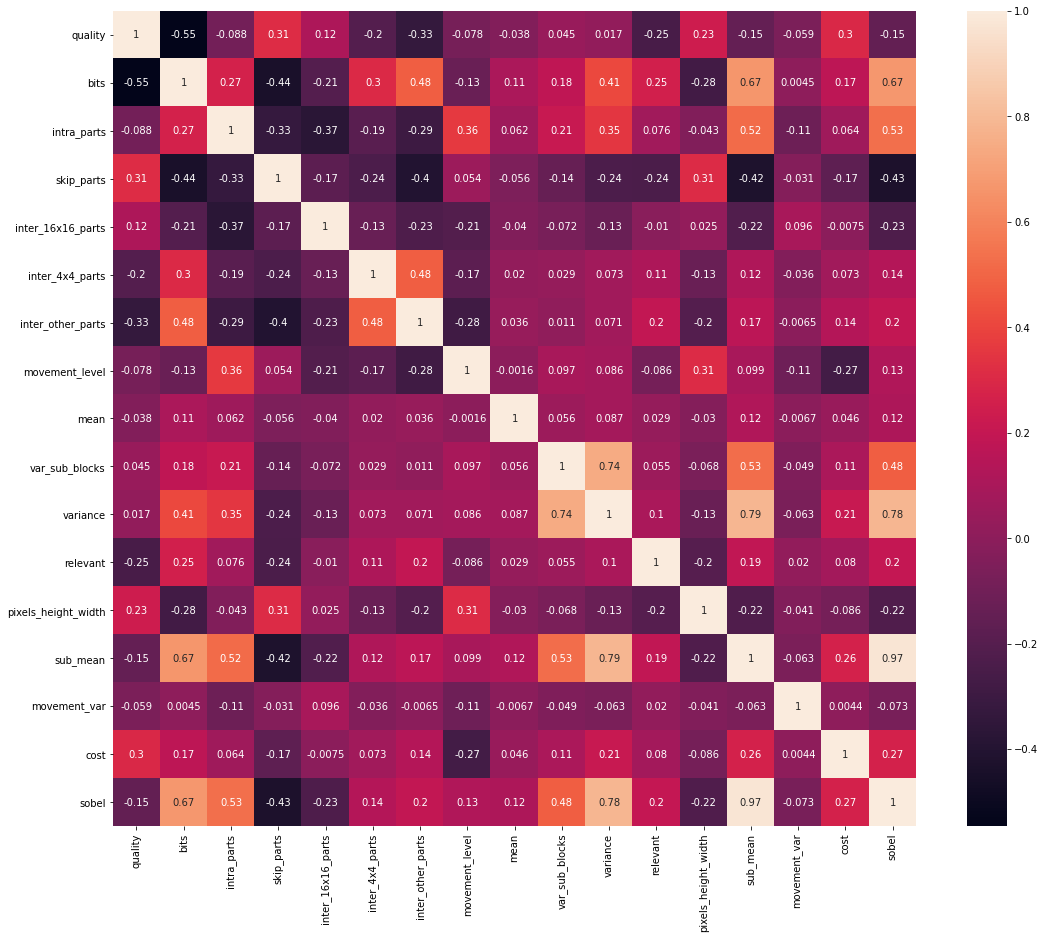

In [84]:
# Here we explore how the transformed variables correlate with the relevan and check if there is not much variability is shared among predictor variables
plt.figure(figsize=(18, 15))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [85]:
# deleting based on correlation pattern with other variables
df = df.drop(["var_sub_blocks", "sub_mean", "movement_var", "inter_16x16_parts", "mean"], axis=1)

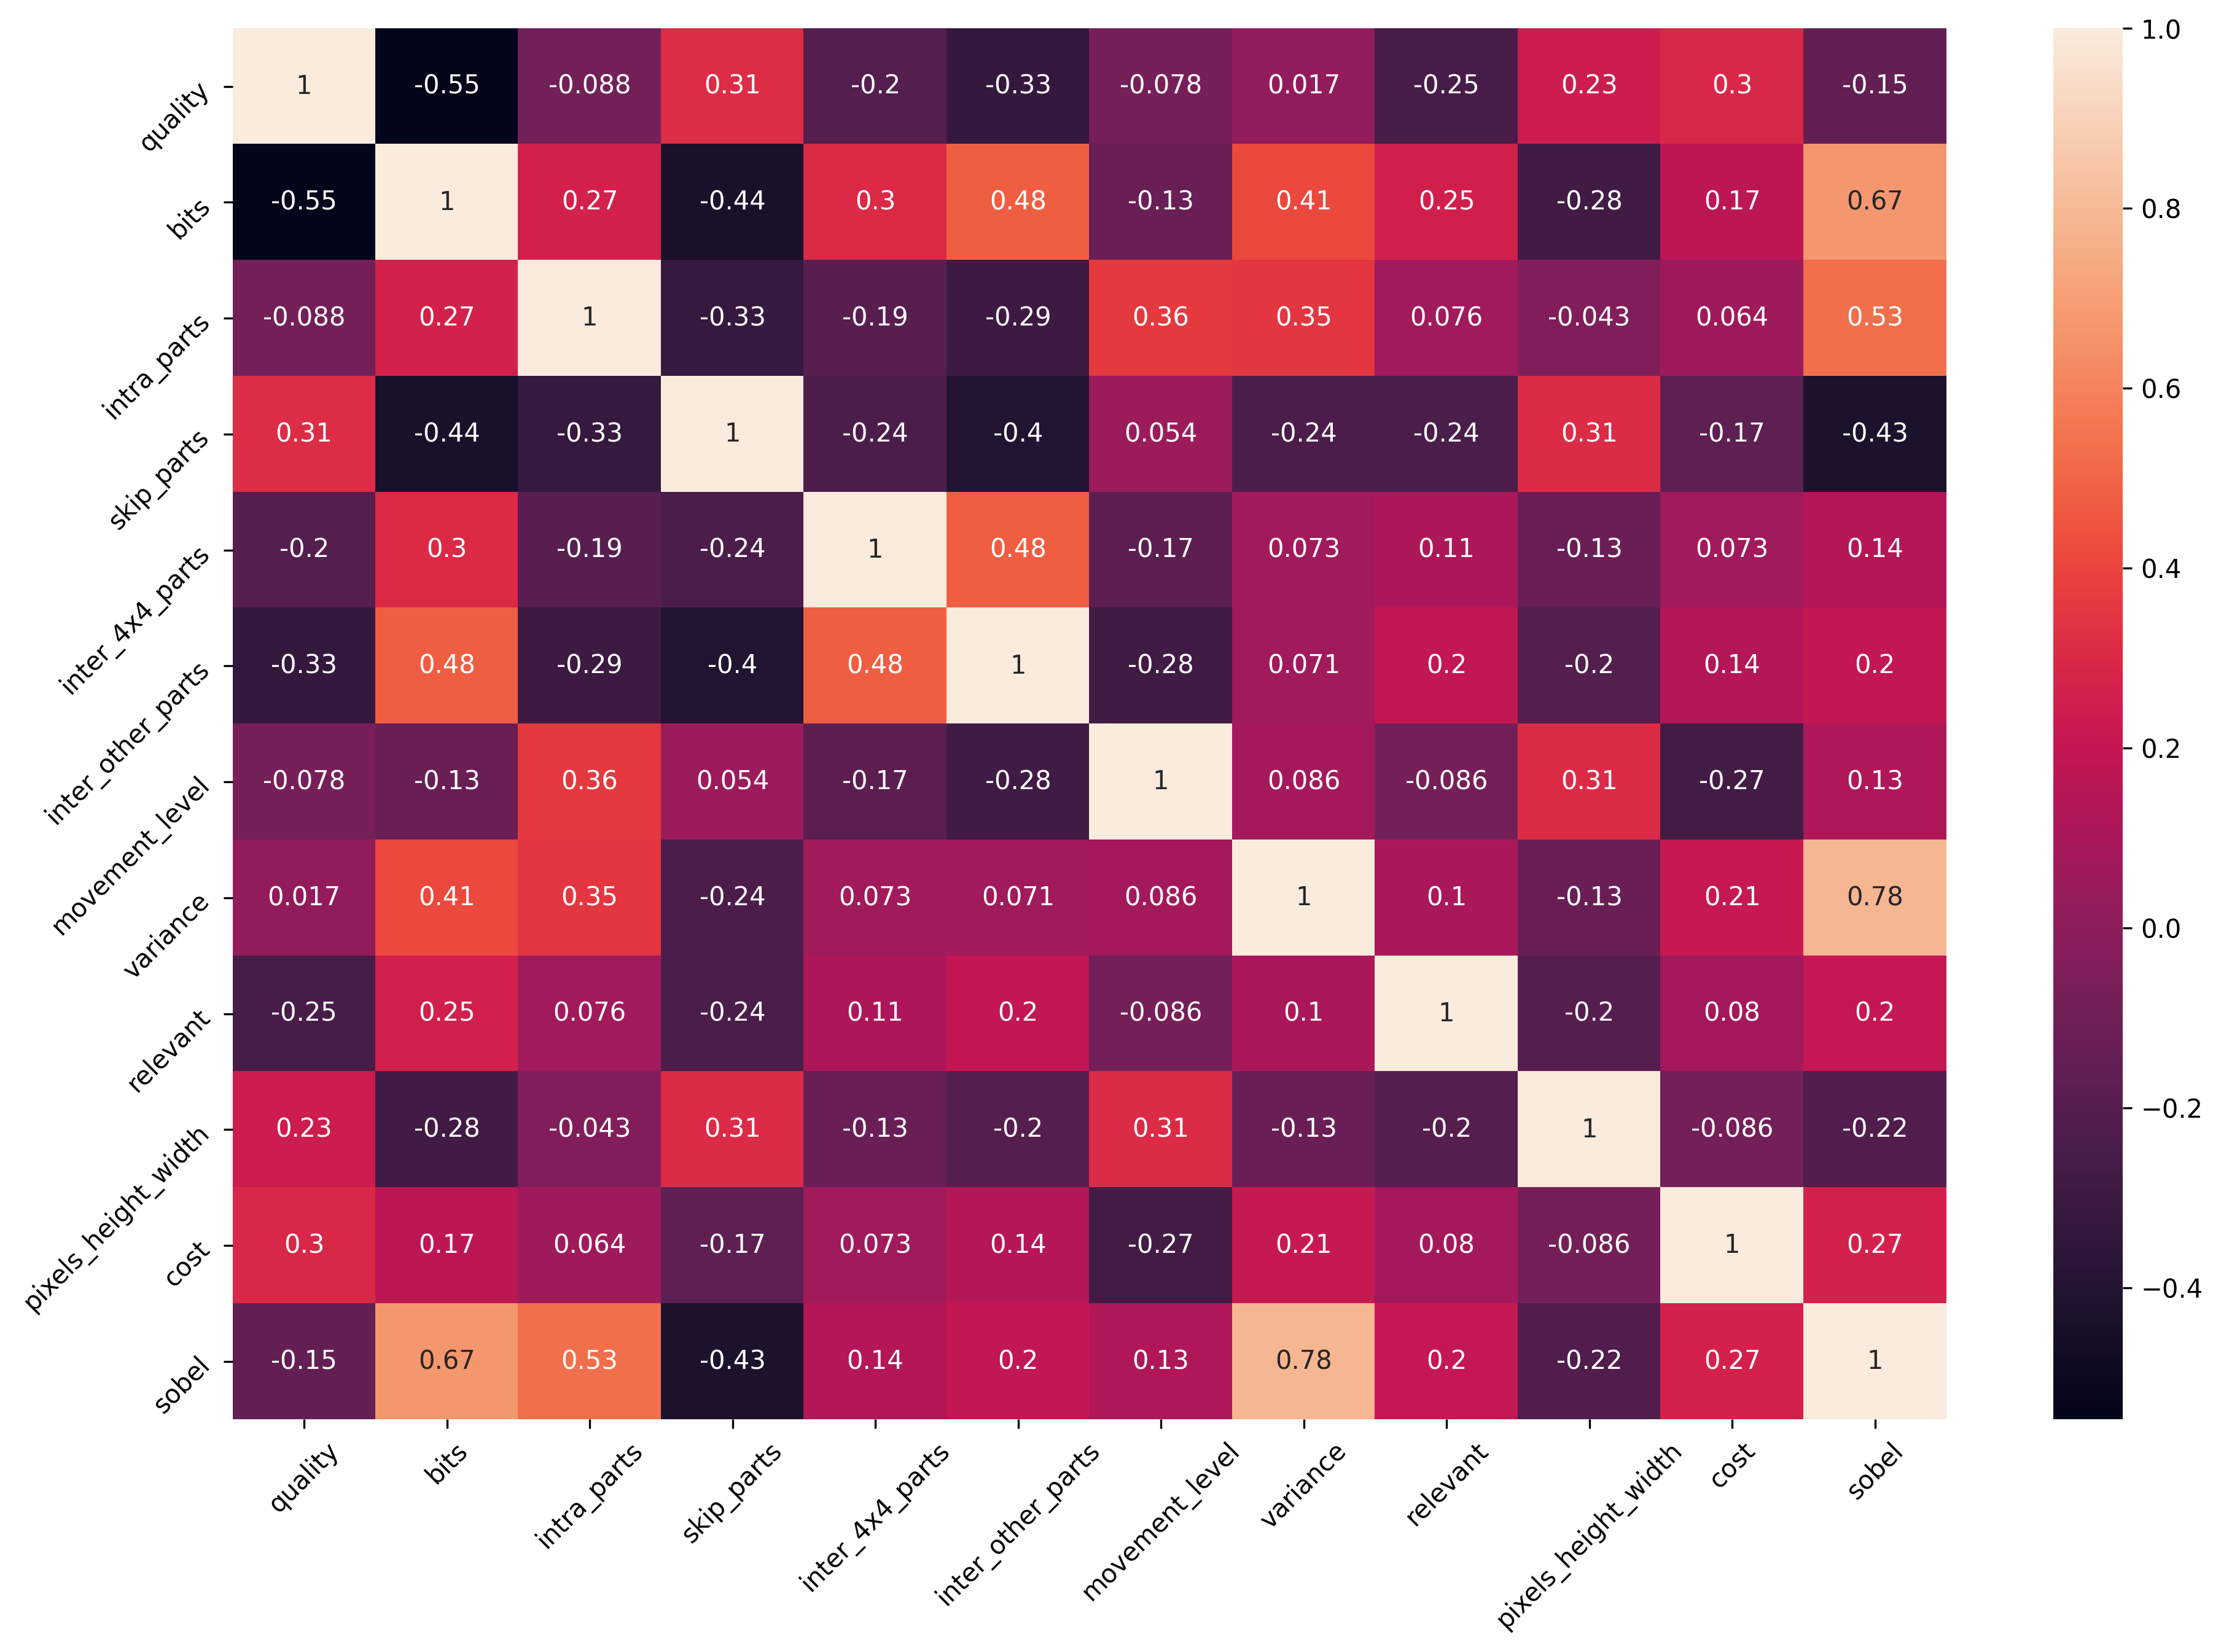

In [86]:
# Generation of the final correlation matrix of variables we use for predicting "relevant"
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.figure(figsize=(15, 10))
corrMatrix = df.corr()
viz = sns.heatmap(corrMatrix, annot=True)
viz.set_xticklabels(viz.get_xticklabels(), rotation=45)
viz.set_yticklabels(viz.get_yticklabels(), rotation=45)
plt.savefig('FinalCorr.png')
plt.show()

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quality,15967.0,2.951112e+01,5.589634e+00,22.000000,27.000000,32.000000,3.700000e+01,3.700000e+01
bits,15967.0,4.492800e+02,5.488323e+02,0.000000,71.000000,243.000000,6.210000e+02,4.771000e+03
intra_parts,15967.0,1.102868e+01,1.904291e+01,0.000000,0.000000,0.000000,1.600000e+01,6.400000e+01
skip_parts,15967.0,8.498152e-01,1.182036e+00,0.000000,0.000000,0.000000,1.000000e+00,4.000000e+00
inter_4x4_parts,15967.0,1.976765e+00,3.899996e+00,0.000000,0.000000,0.000000,3.000000e+00,3.300000e+01
inter_other_parts,15967.0,3.684286e+00,4.442187e+00,0.000000,0.000000,2.000000,6.000000e+00,2.700000e+01
movement_level,15967.0,4.029269e+06,4.444461e+06,31645.000000,240975.000000,528973.000000,6.599839e+06,1.227660e+07
variance,15967.0,5.332723e+01,1.073384e+02,0.000000,1.411474,14.461300,5.244963e+01,2.022198e+03
relevant,15967.0,8.220705e-01,3.824653e-01,0.000000,1.000000,1.000000,1.000000e+00,1.000000e+00
pixels_height_width,15967.0,inf,NaN,153.836672,4992.000000,41795.918367,3.413333e+05,inf


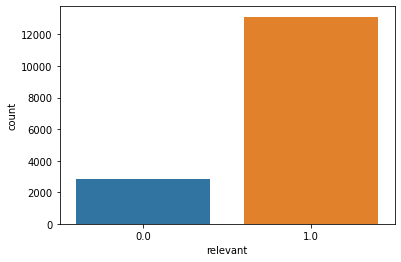

In [88]:
# Here we see that number of observations to be releavant is 6 times higher than number or irrelevant observations
%matplotlib inline
sns.countplot(x='relevant', data=df)
plt.show()

In [89]:
# Cheking the generated continuous data 
cont = df.loc[:, df.nunique() >= 30]
lst = cont.columns.tolist()
lst.append('relevant')
cont_rel = df[lst]

<AxesSubplot:xlabel='relevant', ylabel='sobel'>

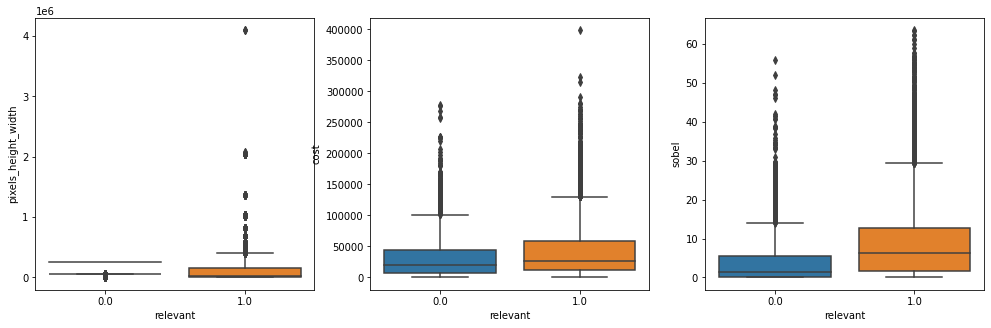

In [91]:
# Here we check how the generated and selected variables correlate with the relevance to colonoscopy
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1,figsize=(17, 5))
sns.boxplot(y="pixels_height_width", x="relevant", data=df, ax=ax1)
sns.boxplot(y="cost", x="relevant", data=df, ax=ax2)
sns.boxplot(y="sobel", x="relevant", data=df, ax=ax3)

In [92]:
# Checking if all the sub-groups (relevant=0 and relevant=1) of variables are statistically different from each other

In [93]:
# All sub-groups of variables are statistically different from mean
equality_testing(cont_rel, ["pixels_height_width", "cost", "sobel"], cont_rel.columns[-1])

PIXELS_HEIGHT_WIDTH
!!!The groups related to 1 or 0 are different :pixels_height_width
COST
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :cost
SOBEL
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :sobel


### Data Trasformation

In [94]:
# The column that has less than 30 different values is considered to have categorical data
cat = df.loc[:, df.nunique() < 30]
cont = df.loc[:, df.nunique() >= 30]

In [95]:
# Normalization of continuous data

In [96]:
print(cont.head())
for var in cont.columns:
    cont[var] = cont[var].apply(lambda x:  x / df[var].max())
cont.head()

   bits  movement_level    variance  pixels_height_width     cost      sobel
0  2143           42352   87.584335           247.128713      0.0  17.397461
1  1735           42352   48.025330           262.047244   8808.5  14.330078
2  1971           42352   56.613480           217.043478   5148.5  14.578125
3  2473           42352  283.079285           237.149644  20666.5  25.445312
4  1093           42352  175.123245           597.844311  14811.0  13.141602


,bits,movement_level,variance,pixels_height_width,cost,sobel
0,0.449172,0.00345,0.043311,0.0,0.000000,0.273892
1,0.363655,0.00345,0.023749,0.0,0.022100,0.225601
2,0.413121,0.00345,0.027996,0.0,0.012917,0.229506
3,0.518340,0.00345,0.139986,0.0,0.051852,0.400590
4,0.229092,0.00345,0.086600,0.0,0.037160,0.206891


In [97]:
# Categorical data transofmations:

In [98]:
# We belive that the order for the selected categorical variables matters so we use Label encoder. 
# We found no need in One-Hot encoding as NONE of the variables had only categorycal difference (difference by class) and not by order.

print(cat.head())
from sklearn.preprocessing import LabelEncoder
# This technique gives the highest priority due to its label and lowest priority for its label being 0.
encode = LabelEncoder()
for el in cat.columns:
    encode.fit(cat[el])
    cat[el] = encode.transform(cat[el])
cat.head()

   quality  intra_parts  skip_parts  inter_4x4_parts  inter_other_parts  \
0       22            0           0                3                 21   
1       22            0           2                3                  8   
2       22            0           0                0                  8   
3       22            0           0               18                 20   
4       22            0           0                3                  8   

   relevant  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0  


,quality,intra_parts,skip_parts,inter_4x4_parts,inter_other_parts,relevant
0,0,0,0,1,21,1
1,0,0,2,1,8,1
2,0,0,0,0,8,1
3,0,0,0,6,20,1
4,0,0,0,1,8,1


In [99]:
# First version

In [100]:
from sklearn.utils import shuffle
from sklearn import metrics

In [101]:
df = pd.concat([cont, cat], axis=1)

In [102]:
# As there are 6 times more relevant data then irrelevant from relevant we randomly select a sample of the size equal to the irrelevant data
#(This will help to avoid the low recall)

sample_size = df['relevant'].value_counts()[0]
relevant = df[df.relevant == 0]
not_relevant = df[df.relevant == 1].sample(sample_size , replace = False)
relevant = relevant.reset_index(drop = True)
not_relevant = not_relevant.reset_index(drop = True)
fin_df = not_relevant.append(relevant)
fin_df = shuffle(fin_df).reset_index(drop = True)
fin_df = fin_df.dropna(axis=1)
fin_df.head()

,bits,movement_level,variance,cost,sobel,quality,intra_parts,skip_parts,inter_4x4_parts,inter_other_parts,relevant
0,0.153637,0.025254,0.043812,0.148537,0.195791,1,0,0,1,20,1
1,0.477468,0.026302,0.126457,0.380906,0.595351,1,5,0,0,8,1
2,0.082792,0.866342,0.181397,0.100158,0.418132,2,12,0,0,2,1
3,0.269126,0.882480,0.335940,0.092957,0.739361,1,14,0,0,0,0
4,0.011738,0.444044,0.000708,0.014299,0.012192,1,0,2,1,5,1


In [103]:
# Saving to the file
fin_df.to_csv("tryMe.csv", index=False)

In [104]:

#Importing all the libraries for modelling 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn import tree


In [109]:
#Deviding in explanatory variables and our target variable

X = fin_df[fin_df.columns[:-1]]
y = fin_df[fin_df.columns[-1]]

In [110]:
#Logistic Regression model


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


confusion = metrics.confusion_matrix(y_test,y_pred)

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

accuracy = (TP + TN) / float(TP+TN+FP+FN) # metrics.accuracy_score(y_test, y_pred)
sensitiviy = TP / float(TP+FN)  #recall metrics.recall_score(y_test, y_pred)
specificity = TN / float(TN+FP) #when the actual value is negative, how often is the predicion correct?
precision = TP / float(TP+FP)   #metrics.precision_score(y_test, y_pred)


print("METRICS FOR LOGISTIC REGRESSION")
print("accuracy", accuracy.round(4))  
print("recall", sensitiviy.round(4))
print("specificity", specificity.round(4))
print("precision",precision.round(4))

METRICS FOR LOGISTIC REGRESSION
accuracy 0.7056
recall 0.6667
specificity 0.7428
precision 0.7128


In [111]:
#Decision Tree model

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=0)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train2, y_train2)

y_pred2 = clf.predict(X_test2)


confusion = metrics.confusion_matrix(y_test2,y_pred2)

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

accuracy = (TP + TN) / float(TP+TN+FP+FN) # metrics.accuracy_score(y_test, y_pred)
sensitiviy = TP / float(TP+TN)  #recall metrics.recall_score(y_test, y_pred)
specificity = TN / float(TN+FP) #when the actual value is negative, how often is the predicion correct?
precision = TP / float(TP+FP)   #metrics.precision_score(y_test, y_pred)

print("METRICS FOR DECISION TREE")
print("accuracy", accuracy.round(4))  
print("recall", sensitiviy.round(4))
print("specificity", specificity.round(4))
print("precision",precision.round(4))


#tree.plot_tree(clf) 

METRICS FOR DECISION TREE
accuracy 0.6334
recall 0.5046
specificity 0.6142
precision 0.6186


In [112]:
#Random Forest model

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=0)

#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train3,y_train3)

y_pred3=clf.predict(X_test3)

confusion = metrics.confusion_matrix(y_test3,y_pred3)

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

accuracy = (TP + TN) / float(TP+TN+FP+FN) # metrics.accuracy_score(y_test, y_pred)
sensitiviy = TP / float(TP+TN)  #recall metrics.recall_score(y_test, y_pred)
specificity = TN / float(TN+FP) #when the actual value is negative, how often is the predicion correct?
precision = TP / float(TP+FP)   #metrics.precision_score(y_test, y_pred)

print("METRICS FOR RANDOM FOREST")
print("accuracy", accuracy.round(4))  
print("recall", sensitiviy.round(4))
print("specificity", specificity.round(4))
print("precision",precision.round(4))

METRICS FOR RANDOM FOREST
accuracy 0.6997
recall 0.4761
specificity 0.7176
precision 0.6978
